In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_regression,r_regression,mutual_info_regression, f_classif

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,max_error 

import warnings
warnings.filterwarnings('ignore')

In [2]:
absence=['na','-','I']
bokhol=pd.read_excel('basedonnees.xlsx',na_values=absence,parse_dates=True,index_col=[0])

In [3]:
bokhol.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105119 entries, 2021-01-01 00:05:00 to 2021-12-31 23:55:00
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   W2- Irradiance (W/m²)              105069 non-null  float64
 1   W3 - Irradiance (W/m²)             105060 non-null  float64
 2   W4 - Irradiance (W/m²)             105062 non-null  float64
 3    Temperature ambiante (°C)         105074 non-null  float64
 4    Vitesse du vent (m/s)             105077 non-null  float64
 5   Température module (°C)            104872 non-null  float64
 6   Production Centrale Meter 1 - (W)  104502 non-null  float64
dtypes: float64(7)
memory usage: 6.4 MB


In [4]:
bokhol=bokhol.dropna(axis=0)
bokhol.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

In [5]:
bokhol=bokhol.drop([bokhol.columns[1],bokhol.columns[2]],axis=1)
bokhol.head()

,W2- Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,
2021-01-01 00:05:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,21.9667,1.7416,25.9,0.0


In [27]:
bokhol.to_excel("centralebokhol.xlsx",index=False)

In [6]:
X=bokhol.drop([bokhol.columns[4],bokhol.columns[2]],axis=1)
y=bokhol[['Production Centrale Meter 1 - (W)']]

In [7]:
seuil=12 # POUR 1H
X_train=X[12:]
y_train=y[12:]

X_teste=X[:12]
y_teste=y[:12]

print(X_train.shape)
print(X_teste.shape)
print("______________________________")
print(y_train.shape)
print(y_teste.shape)

(104226, 3)
(12, 3)
______________________________
(104226, 1)
(12, 1)


### KNN

In [8]:
params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=10)
grid.fit(X_train,y_train)
modele4=grid.best_estimator_

print(f"score sur le train set:{modele4.score(X_train,y_train)}")
print("_________performances estatistique apres entrainement_________")
print(f"RMSE_train:{np.sqrt(mean_squared_error(y_train,modele4.predict(X_train)))}")
print(f"MAE_train:{mean_absolute_error(y_train, modele4.predict(X_train))}")
print(f"MAPE_train:{np.sqrt(mean_absolute_percentage_error(y_train,modele4.predict(X_train)))}")
print(f"ME_train:{max_error(y_train,modele4.predict(X_train))}")
print("__________performances statistiques en test___________________")
print(f"score sur le teste set:{modele4.score(X_teste,y_teste)}")
print(f"MAE_test:{mean_absolute_error(y_teste, modele4.predict(X_teste))}")


score sur le train set:0.8792914827941127
_________performances estatistique apres entrainement_________
RMSE_train:2096316.0230640965
MAE_train:1118186.953551498
MAPE_train:8962410429.888437
ME_train:46301178.94736842
__________performances statistiques en test___________________
score sur le teste set:1.0
MAE_test:0.0


In [9]:
scal=MinMaxScaler()
X_traina=scal.fit_transform(np.array(X_train))
y_traina=scal.fit_transform(np.array(y_train))

X_testea=scal.fit_transform(np.array(X_teste))
y_testea=scal.fit_transform(np.array(y_teste))

In [10]:
params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=10)
grid.fit(X_traina,y_traina)
modele4a=grid.best_estimator_

print(f"score sur le train set:{modele4a.score(X_train,y_train)}")
print("_________performances estatistique apres entrainement_________")
print(f"RMSE_train:{np.sqrt(mean_squared_error(y_traina,modele4a.predict(X_traina)))}")
print(f"MAE_train:{mean_absolute_error(y_traina, modele4a.predict(X_traina))}")
print(f"MAPE_train:{np.sqrt(mean_absolute_percentage_error(y_traina,modele4a.predict(X_traina)))}")
print(f"ME_train:{max_error(y_traina,modele4a.predict(X_traina))}")
print("__________performances statistiques en test___________________")
print(f"score sur le teste set:{modele4.score(X_teste,y_teste)}")
print(f"MAE_test:{mean_absolute_error(y_teste, modele4.predict(X_teste))}")

score sur le train set:-0.5535122000235906
_________performances estatistique apres entrainement_________
RMSE_train:0.03489096962485248
MAE_train:0.018762654068634796
MAPE_train:1029947.0033552778
ME_train:0.7394758011548745
__________performances statistiques en test___________________
score sur le teste set:1.0
MAE_test:0.0


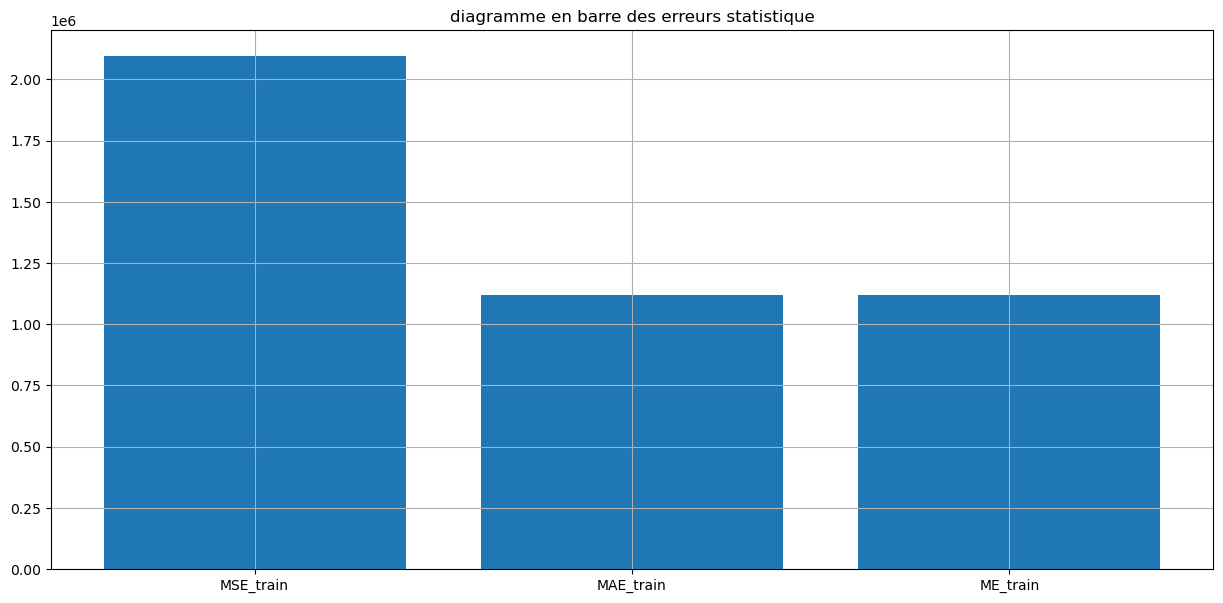

In [11]:
Sn=['MSE_train','MAE_train','ME_train']
sv=[2096316.0230640965,1118186.953551498,1118186.953551498]
plt.figure(figsize=(15,7))
plt.bar(x=Sn,height=sv)
plt.title("diagramme en barre des erreurs statistique")
plt.grid()

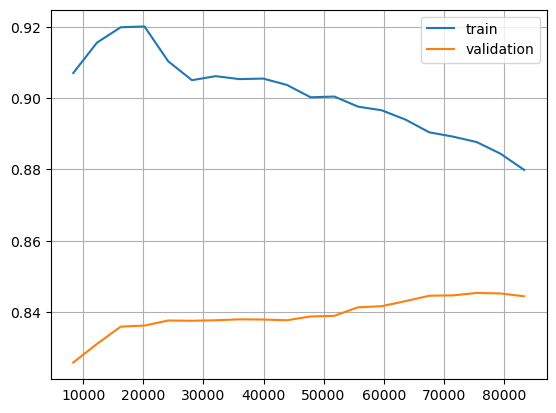

In [12]:
N,train_score,val_score=learning_curve(modele4,X_train,y_train,
                                       train_sizes=np.linspace(0.1,1.0,20),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend();

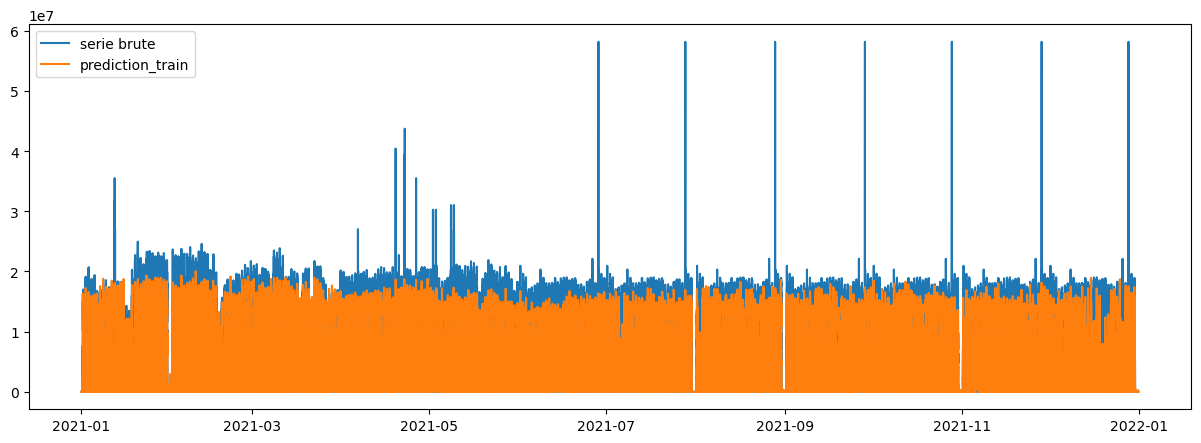

In [13]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='serie brute')
plt.plot(X_train.index,modele4.predict(X_train),label='prediction_train')
plt.legend();

In [14]:
modele4.predict(X_train).shape
modele4.predict(X_train).ravel().shape

(104226,)

In [15]:
data_predictKNN=pd.DataFrame({'DATE':y_train.index,
              'y_train':np.array(y_train).ravel(),
              'predict':modele4.predict(X_train).ravel()
              })

data_predictKNN.set_index('DATE',inplace=True)

In [16]:
data_predictKNN

,y_train,predict
DATE,,
2021-01-01 01:05:00,0.0,0.000000
2021-01-01 01:10:00,0.0,0.000000
2021-01-01 01:15:00,0.0,0.000000
2021-01-01 01:20:00,0.0,0.000000
2021-01-01 01:25:00,0.0,0.000000
...,...,...
2021-12-31 20:40:00,0.0,0.000000
2021-12-31 20:45:00,0.0,0.000000
2021-12-31 20:50:00,0.0,27915.789474


KeyError: '2021-01-01'

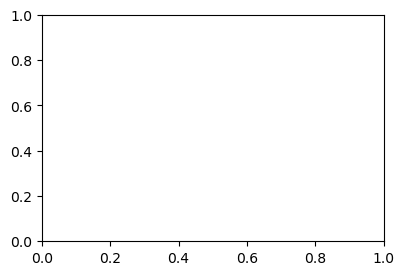

In [17]:
mois=['2021-01-01','2021-03-01','2021-06-01','2021-09-01','2021-12-01']
moisch=['jenvier','Mars','juin','septembre','Decembre']
plt.figure(figsize=(15,10))
for i,j in enumerate(mois):
    plt.subplot(3,3,1+i)
    plt.plot(data_predictKNN[j])
    plt.title(moisch[i])

In [18]:
plt.figure(figsize=(15,7))
plt.plot(data_predictKNN['2021-03-01'])
plt.title('Mars')

KeyError: '2021-03-01'

<Figure size 1500x700 with 0 Axes>

In [19]:
data_predictKNN['2021-01-01'].plot(figsize=(15,5))
plt.title('janvier');

KeyError: '2021-01-01'

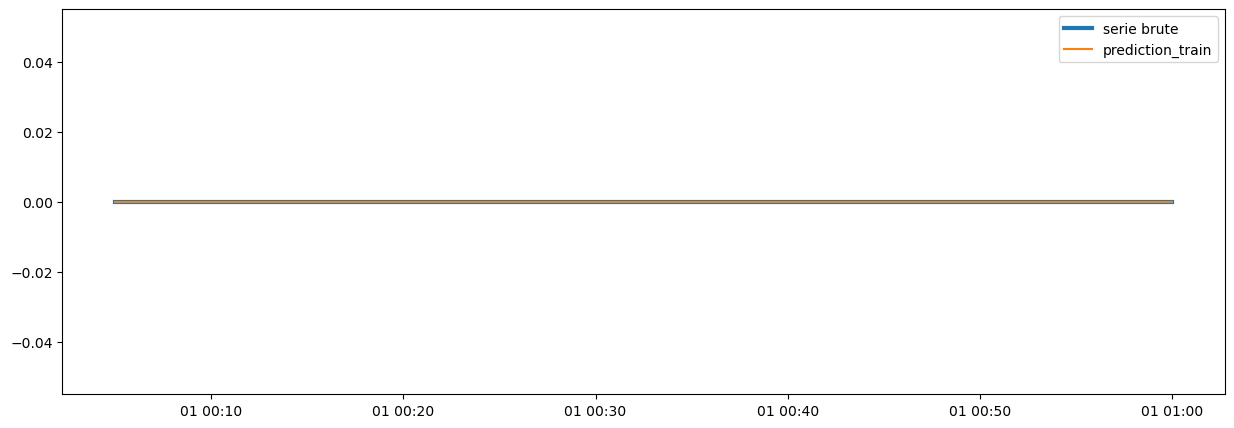

In [20]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='serie brute',lw=3)
plt.plot(X_teste.index,modele4.predict(X_teste),label='prediction_train')
plt.legend()

### ensemble methode Adaboost

In [21]:
from sklearn.ensemble import BaggingRegressor
# Création du modèle
model = BaggingRegressor(random_state=42)
# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300],
    #'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(X_traina, y_traina)
# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_
# Sur l'ensemble d'entrainement
train_predictions = best_model.predict(X_traina)
print("R2_Train:", r2_score(y_traina, train_predictions))
# Sur l'ensemble de test
#test_predictions = best_model.predict(X_teste)
#print("R2_Test:", r2_score(y_teste, test_predictions))

Best Parameters:  {'n_estimators': 300}
R2_Train: 0.9818078914405757


In [22]:
print(f"MSE_train:{np.sqrt(mean_squared_error(y_traina,best_model.predict(X_traina)))}")
print(f"MAE_train:{mean_absolute_error(y_traina, best_model.predict(X_traina))}")
print(f"MAPE_train:{np.sqrt(mean_absolute_percentage_error(y_traina,best_model.predict(X_traina)))}")
print(f"ME_train:{max_error(y_traina,best_model.predict(X_traina))}")
#print("__________performances statistiques en test___________________")
#print(f"score sur le teste set:{best_model.score(X_teste,y_teste)}")
#print(f"MAE_test:{mean_absolute_error(y_teste, best_model.predict(X_teste))}")

MSE_train:0.013988672428982794
MAE_train:0.007425125466890964
MAPE_train:651114.9082598999
ME_train:0.3588186940686623


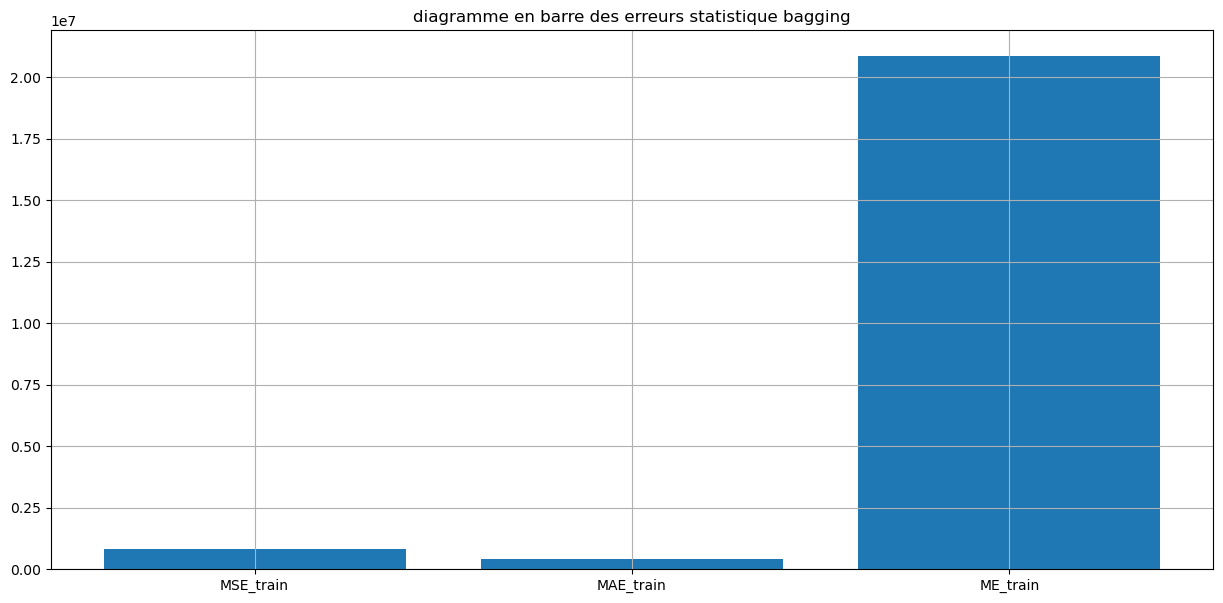

In [23]:
Sn=['MSE_train','MAE_train','ME_train']
sv=[814005.9143290258,431997.36353347125,20869642.92857143]
plt.figure(figsize=(15,7))
plt.bar(x=Sn,height=sv)
plt.title("diagramme en barre des erreurs statistique bagging")
plt.grid()

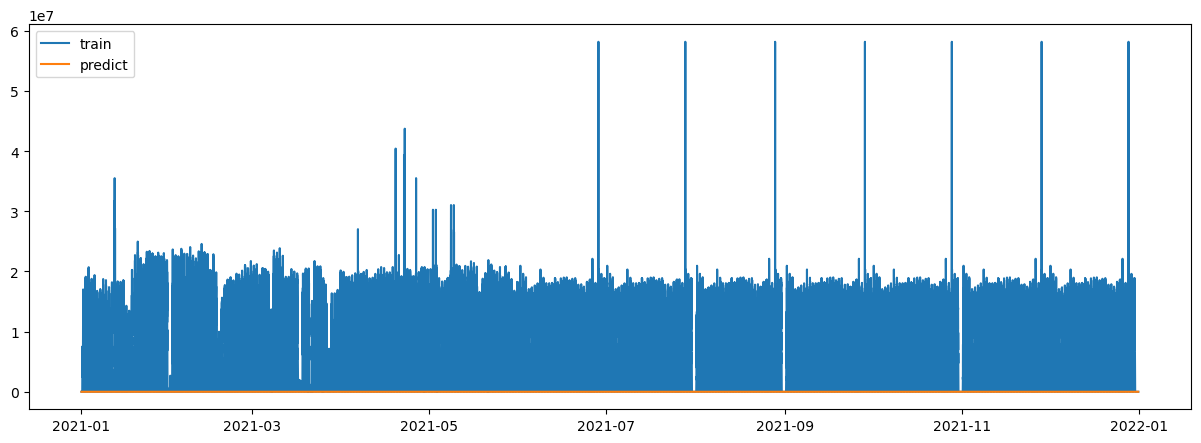

In [24]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='train')
plt.plot(X_train.index,best_model.predict(X_train),label='predict');
plt.legend();

In [25]:
bm=best_model.predict(X_train)
bm

array([0.00785242, 0.00785242, 0.00785242, ..., 0.00785242, 0.00785242,
       0.00785242])

In [28]:
data_predict=pd.DataFrame({'DATE':y_train.index,
              'y_train':np.array(y_train).ravel(),
              'predict':bm})



In [29]:
data_predict.set_index('DATE',inplace=True)
data_predict

,y_train,predict
DATE,,
2021-01-01 01:05:00,0.0,0.007852
2021-01-01 01:10:00,0.0,0.007852
2021-01-01 01:15:00,0.0,0.007852
2021-01-01 01:20:00,0.0,0.007852
2021-01-01 01:25:00,0.0,0.007852
...,...,...
2021-12-31 20:40:00,0.0,0.007852
2021-12-31 20:45:00,0.0,0.007852
2021-12-31 20:50:00,0.0,0.007852


KeyError: '2021-01-01'

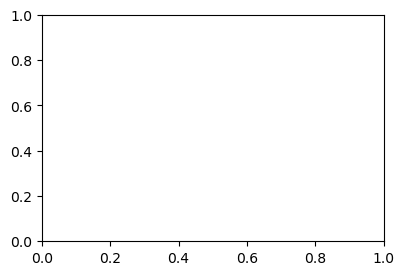

In [30]:
mois=['2021-01-01','2021-03-01','2021-06-01','2021-09-01','2021-12-01']
moisch=['jenvier','Mars','juin','septembre','Decembre']
plt.figure(figsize=(15,10))
for i,j in enumerate(mois):
    plt.subplot(3,3,1+i)
    plt.plot(data_predict[j])
    plt.title(moisch[i])

KeyError: '2021-01-01'

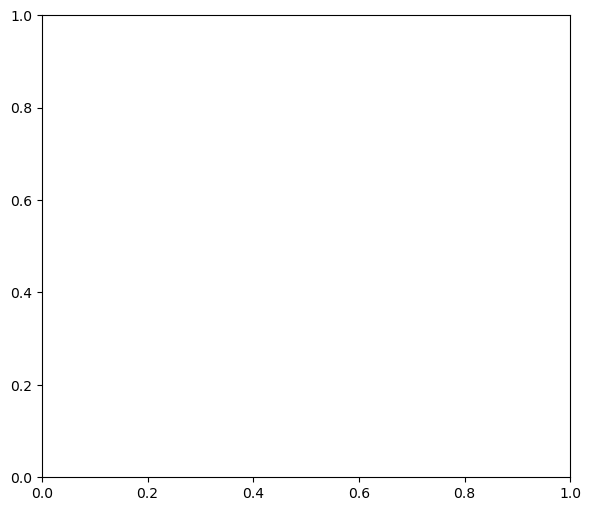

In [31]:
mois=['2021-01-01','2021-03-01']
moisch=['jenvier','Mars']
plt.figure(figsize=(15,6))
for i,j in enumerate(mois):
    plt.subplot(1,2,1+i)
    plt.plot(data_predict[j])
    plt.title(moisch[i])

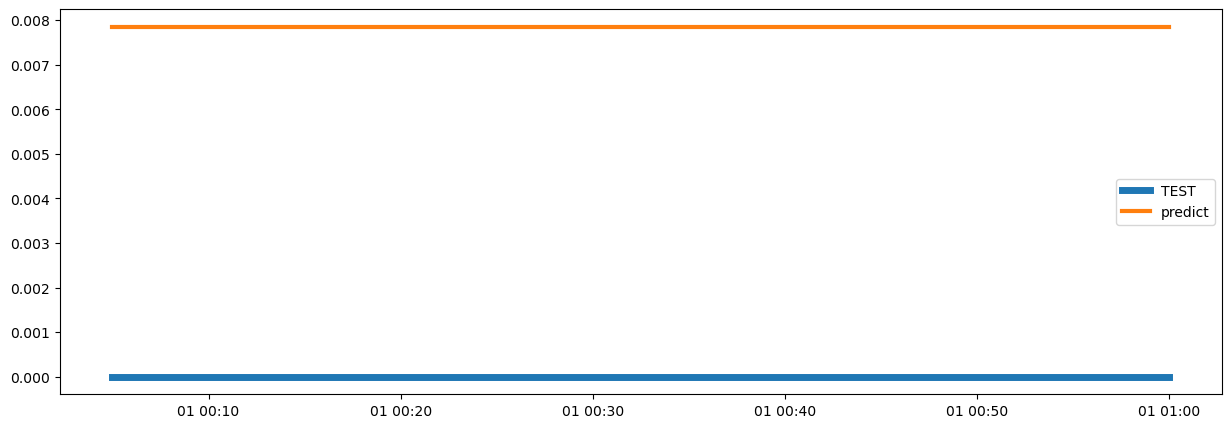

In [32]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='TEST',lw=5)
plt.plot(X_teste.index,best_model.predict(X_teste),label='predict',lw=3)
plt.legend()

### LINEAR MODEL

In [33]:
modele_1=LinearRegression()
modele_1.fit(X_train,y_train)
trat=KFold(10)#,shuffle=False, random_state=1)
#print(cross_val_score(modele_1,X_train,y_train,cv=trat).mean())

print(f"R2_train:{modele_1.score(X_train,y_train)}")
print(f"R2_teste:{modele_1.score(X_teste,y_teste)}")
print(f"MSE_TRAIN:{np.sqrt(mean_squared_error(y_train,modele_1.predict(X_train)))}")
print(f"MSE_TESTE:{np.sqrt(mean_squared_error(y_teste,modele_1.predict(X_teste)))}")

R2_train:0.8504104706793284
R2_teste:0.0
MSE_TRAIN:2333664.362728903
MSE_TESTE:395151.91981534514


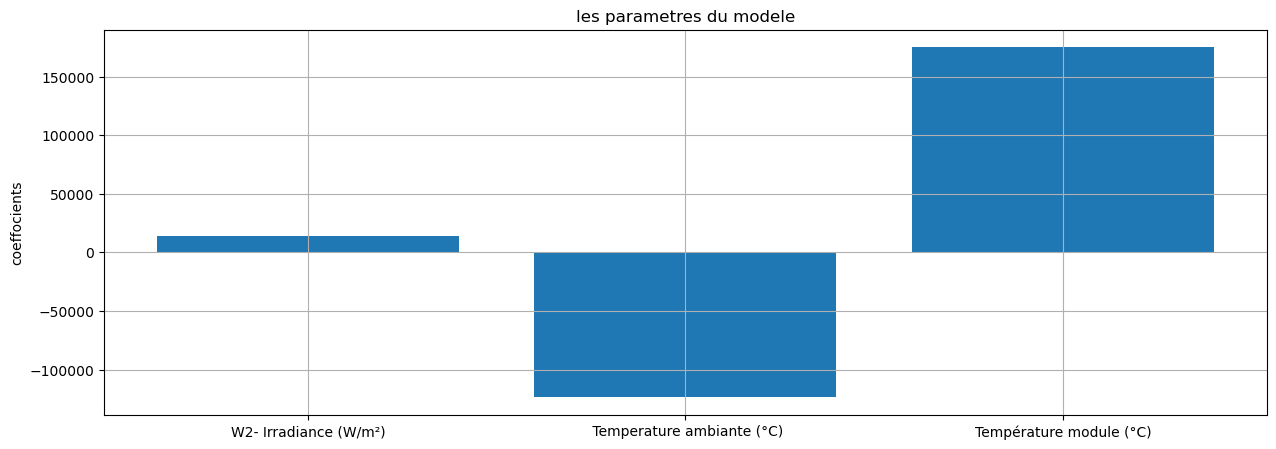

In [34]:
COEF=modele_1.coef_.tolist()[0]
plt.figure(figsize=(15,5))
plt.bar(x=X.columns,height=COEF)
plt.title('les parametres du modele')
plt.ylabel('coeffocients')
plt.grid()

In [35]:
modele_1.predict(X_teste).shape

(12, 1)

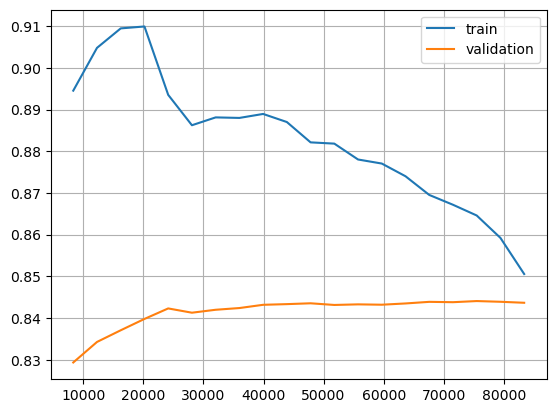

In [36]:
N,train_score,val_score=learning_curve(modele_1,X_train,y_train,
                                       train_sizes=np.linspace(0.1,1.0,20),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend()

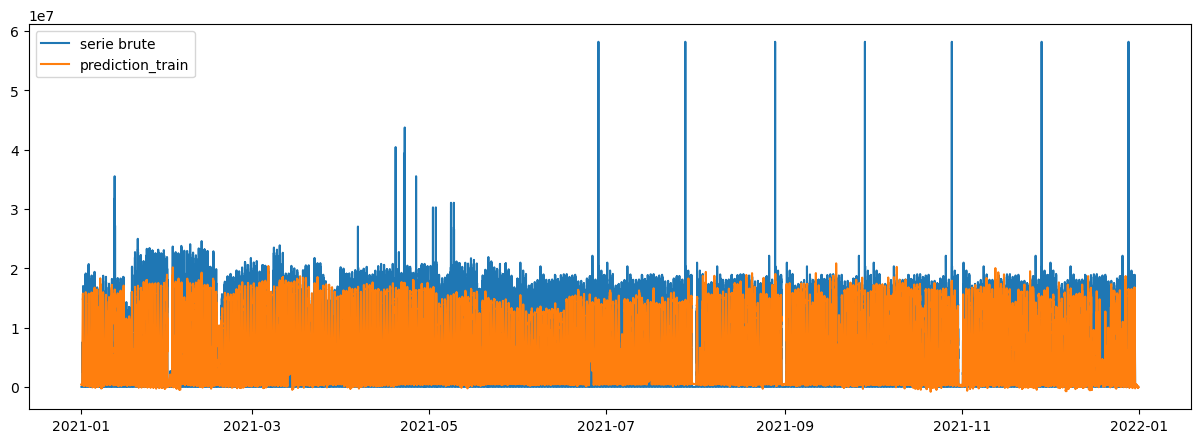

In [37]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='serie brute')
plt.plot(X_train.index,modele_1.predict(X_train),label='prediction_train')
plt.legend()

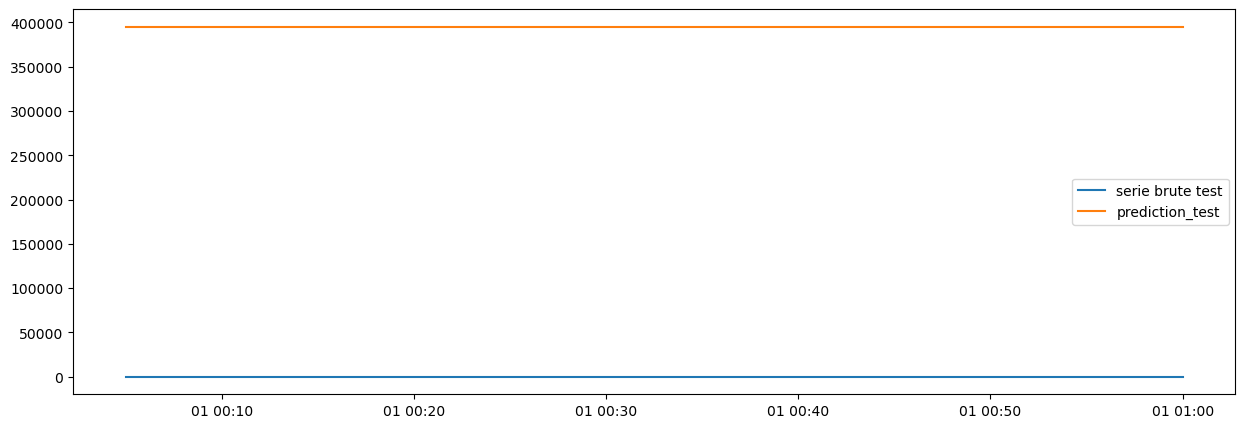

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='serie brute test')
plt.plot(X_teste.index,modele_1.predict(X_teste),label='prediction_test')
plt.legend()

In [39]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 20), cv=10)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 20), cv=10)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 20), cv=10)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)
# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train, ridge_model.predict(X_train))
ridge_test_r2 = r2_score(y_teste, ridge_model.predict(X_teste))
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,ridge_model.predict(X_train)))
ridge_test_rmse = np.sqrt(mean_squared_error(y_teste, ridge_model.predict(X_teste)))

lasso_train_r2 = r2_score(y_train, lasso_model.predict(X_train))
lasso_test_r2 = r2_score(y_teste, lasso_model.predict(X_teste))
lasso_train_rmse = np.sqrt(mean_squared_error(y_train,lasso_model.predict(X_train)))
lasso_test_rmse = np.sqrt(mean_squared_error(y_teste,lasso_model.predict(X_teste)))

enet_train_r2 = r2_score(y_train, enet_model.predict(X_train))
enet_test_r2 = r2_score(y_teste, enet_model.predict(X_teste))
enet_train_rmse = np.sqrt(mean_squared_error(y_train,enet_model.predict(X_train)))
enet_test_rmse = np.sqrt(mean_squared_error(y_teste,enet_model.predict(X_teste)))
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,0.850364,0.0,2.334026e+06,386876.888034
1,Lasso,0.850410,0.0,2.333666e+06,394394.539033
2,ElasticNet,0.850358,0.0,2.334075e+06,386333.918885


### Reseau de neurone

In [40]:
import tensorflow as tf

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model.add(tf.keras.layers.Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])


In [41]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model1.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model1.add(tf.keras.layers.Dense(units=1,activation='relu'))
model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [42]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 15)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316 (1.23 KB)

 Trainable params: 316 (1.23 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
scal=MinMaxScaler()
X_train_scal=scal.fit_transform(X_train)
X_teste_scal=scal.fit_transform(X_teste)
y_train_scal=scal.fit_transform(y_train)
y_teste_scal=scal.fit_transform(y_teste)

In [45]:
model.fit(X_train_scal,y_train_scal,epochs=50)

Epoch 1/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 2/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 3/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 4/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 5/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 6/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 7/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 8/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 12/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015

In [46]:
model.evaluate(X_teste_scal,y_teste_scal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [47]:
print(f'testR2:{r2_score(y_teste_scal,model.predict(X_teste_scal))}')
print(f'trainR2:{r2_score(y_train_scal,model.predict(X_train_scal))}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
testR2:1.0
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
trainR2:0.8642962515252178


In [48]:
MSE_train=np.sqrt(mean_squared_error(scal.inverse_transform(y_train_scal),
                                     scal.inverse_transform(model.predict(X_train_scal))))
MSE_teste=np.sqrt(mean_squared_error(scal.inverse_transform(y_teste_scal),
                                     scal.inverse_transform(model.predict(X_teste_scal))))
print(f'mse train:{MSE_train}')
"""
print(f"MAE_train:{mean_absolute_error(scal.inverse_transform(y_train_scal),
      scal.inverse_transform(model.predict(X_train_scal)))}")
#print(f"MAPE_train:{np.sqrt(mean_absolute_percentage_error(scal.inverse_transform(y_train_scal),
                                     #scal.inverse_transform(model.predict(X_train_scal))))}")
#print(f"ME_train:{max_error(scal.inverse_transform(y_train_scal),
                                     #scal.inverse_transform(model.predict(X_train_scal)))}")"""

3258/3258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
mse train:0.03820594120848448


'\nprint(f"MAE_train:{mean_absolute_error(scal.inverse_transform(y_train_scal),\n      scal.inverse_transform(model.predict(X_train_scal)))}")\n#print(f"MAPE_train:{np.sqrt(mean_absolute_percentage_error(scal.inverse_transform(y_train_scal),\n                                     #scal.inverse_transform(model.predict(X_train_scal))))}")\n#print(f"ME_train:{max_error(scal.inverse_transform(y_train_scal),\n                                     #scal.inverse_transform(model.predict(X_train_scal)))}")'

3258/3258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


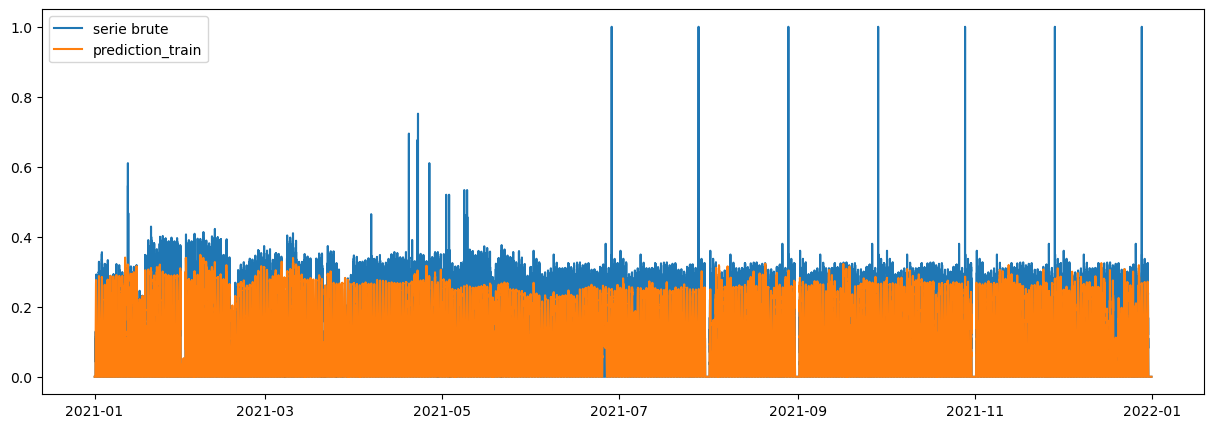

In [49]:
plt.figure(figsize=(15,5))
plt.plot(X_train.index,y_train_scal,label='serie brute')
plt.plot(X_train.index,model.predict(X_train_scal),label='prediction_train')
plt.legend()

In [50]:
PMC=model.predict(X_train_scal)

3258/3258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [51]:
data_predictPMC=pd.DataFrame({'DATE':y_train.index,
              'y_train':np.array(y_train_scal).ravel(),
              'predict':PMC.ravel()})
data_predictPMC.set_index('DATE',inplace=True)

KeyError: '2021-01-01'

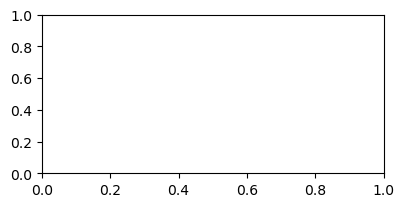

In [52]:
mois=['2021-01-01','2021-03-01','2021-06-01','2021-09-01','2021-12-01']
moisch=['jenvier','Mars','juin','septembre','Decembre']
plt.figure(figsize=(15,7))
for i,j in enumerate(mois):
    plt.subplot(3,3,1+i)
    plt.plot(data_predictPMC[j])
    plt.title(moisch[i])

KeyError: '2021-01-01'

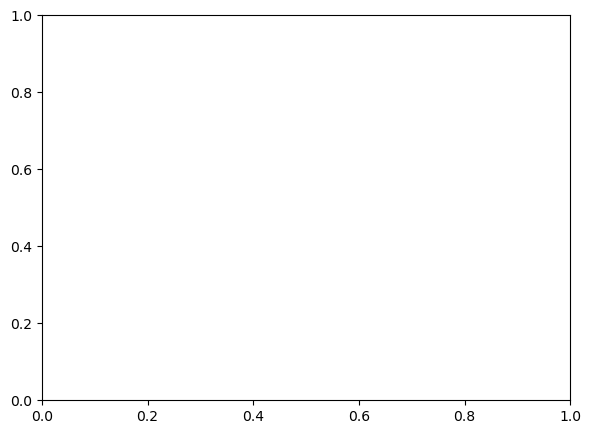

In [53]:
mois=['2021-01-01','2021-03-01']
moisch=['jenvier','Mars']
plt.figure(figsize=(15,5))
for i,j in enumerate(mois):
    plt.subplot(1,2,1+i)
    plt.plot(data_predictPMC[j])
    plt.title(moisch[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


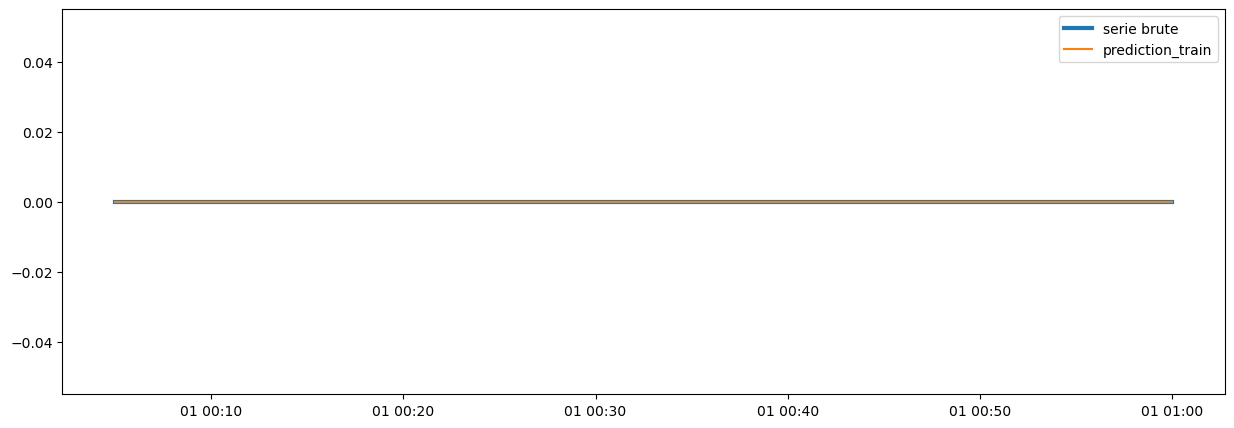

In [54]:
plt.figure(figsize=(15,5))
plt.plot(X_teste.index,y_teste_scal,label='serie brute',lw=3)
plt.plot(X_teste.index,model.predict(X_teste_scal),label='prediction_train')
plt.legend()

In [55]:
model1.fit(X_train_scal,y_train_scal,epochs=50)

Epoch 1/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 2/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 3/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 4/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 5/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 6/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 7/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 8/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 12/50
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0015 - mse: 0.0

In [56]:
print(f'testR2:{r2_score(y_teste_scal,model1.predict(X_teste_scal))}')
print(f'trainR2:{r2_score(y_train_scal,model1.predict(X_train_scal))}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
testR2:1.0
3258/3258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
trainR2:0.8696418567378319


Text(0.5, 1.0, 'La fonction gaussienne')

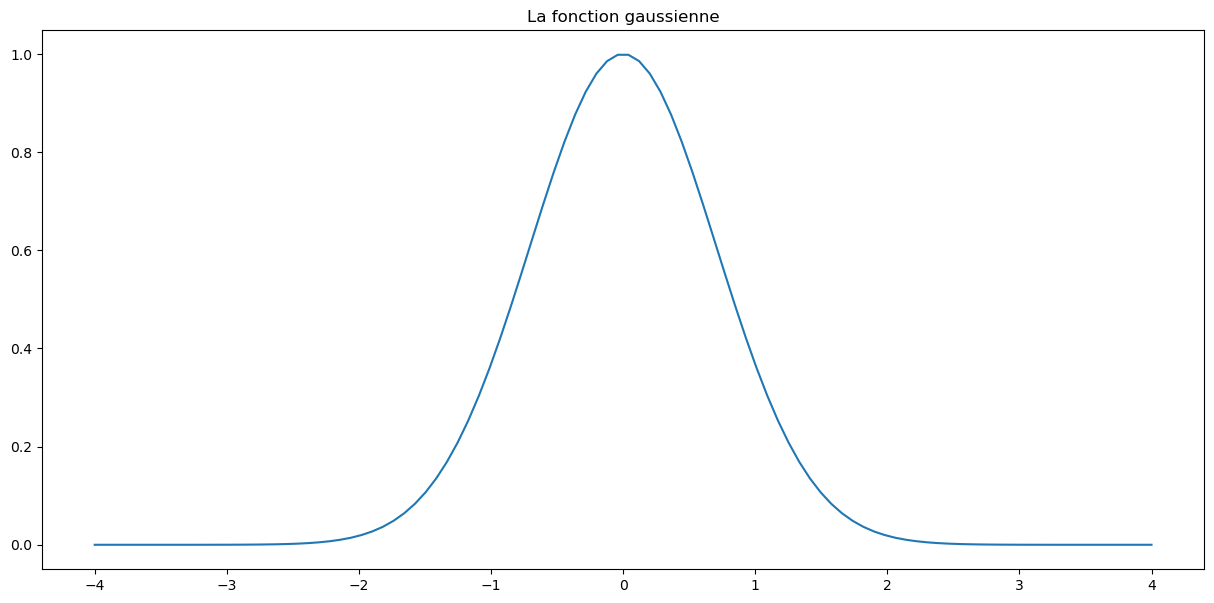

In [57]:
x=np.linspace(-4,4,100)
f=np.exp(-x**2)
plt.figure(figsize=(15,7))
plt.plot(x,f)
plt.title('La fonction gaussienne')